<a href="https://colab.research.google.com/github/choeuneheol/python-practice/blob/master/%EB%AC%B8%EC%A0%9C%ED%95%B4%EA%B2%B0(%ED%96%A5%ED%9B%84%ED%8C%90%EB%A7%A4%EB%9F%89%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

sales_train = pd.read_csv('sales_train.csv')
shops = pd.read_csv('shops.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
# date - 날짜
# date_block_num - 사용하는 날짜 구분자
# shop_id - 상점 ID
# item_id - 상품 ID
# item_price - 상품 판매가
# item_cnt_day - 당일 판매량


In [ ]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
train = sales_train.merge(shops, on='shop_id',how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [ ]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    
    return summary
resumetable(train)

데이터셋 형상 : (2935849, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


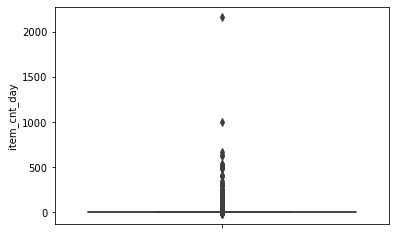

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y='item_cnt_day', data=train);

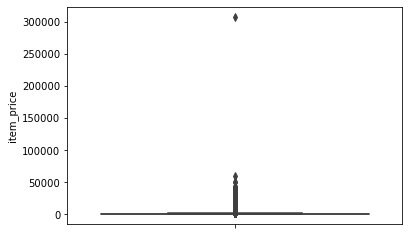

In [ ]:
sns.boxplot(y='item_price', data=train);

In [ ]:
group = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

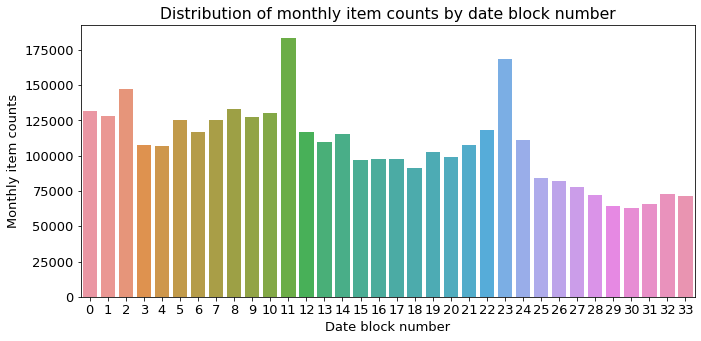

In [ ]:
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

group_month_sum=train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group_month_sum=group_month_sum.reset_index()

sns.barplot(x='date_block_num',y='item_cnt_day', data=group_month_sum)

ax.set(title='Distribution of monthly item counts by date block number',
      xlabel='Date block number',
      ylabel='Monthly item counts')

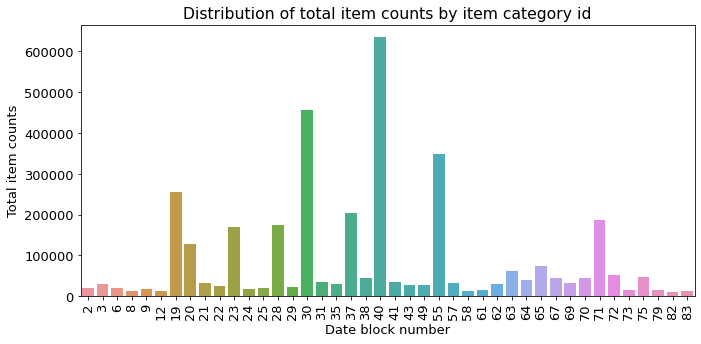

In [ ]:
figure, ax=plt.subplots()
figure.set_size_inches(11, 5)

group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day' : 'sum'})
group_cat_sum = group_cat_sum.reset_index()

group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day']> 10000]

sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum)
ax.set(title='Distribution of total item counts by item category id',
      xlabel='Date block number',
      ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90)

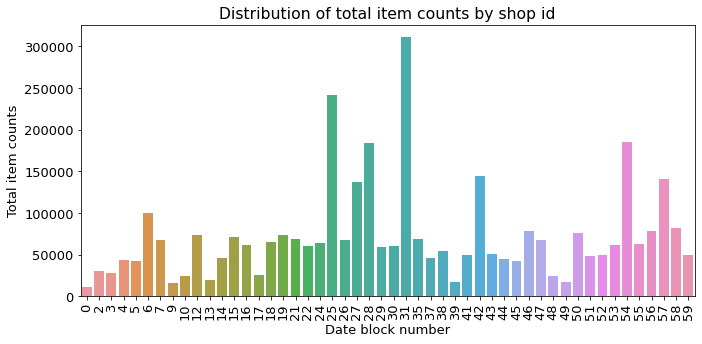

In [ ]:
figure, ax= plt.subplots()
figure.set_size_inches(11, 5)

group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day':'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day']>10000]

sns.barplot(x='shop_id', y='item_cnt_day', data=group_shop_sum)
ax.set(title='Distribution of total item counts by shop id',
      xlabel='Date block number',
      ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90)

In [ ]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

sales_train = pd.read_csv('sales_train.csv')
shops = pd.read_csv('shops.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
sales_train = sales_train.rename(columns={'date':'날짜',
                                          'date_block_num':'월ID',
                                          'shop_id':'상점ID',
                                          'item_id':'상품ID',
                                          'item_price':'판매가',
                                          'item_cnt_day':'판매량'})
sales_train.head()

,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
shops = shops.rename(columns={'shop_name':'상점명',
                             'shop_id':'상점ID'})
shops.head()

,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
items=items.rename(columns={'item_name':'상품명',
                           'item_id':'상품ID',
                           'item_category_id':'상품분류ID'})
items.head()

,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
item_categories = item_categories.rename(columns=
                                        {'item_category_name':'상품분류명',
                                        'item_category_id':'상품분류ID'})
item_categories.head()

,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
test = test.rename(columns={'shop_id':'상점ID',
                           'item_id':'상품ID'})
test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum()/ 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
        
    return df
            

In [ ]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

62.5% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


In [ ]:
from itertools import product

train = []

for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))
    
idx_features = ['월ID', '상점ID', '상품ID']

train = pd.DataFrame(np.vstack(train), columns=idx_features)

train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


In [ ]:
group = sales_train.groupby(idx_features).agg({'판매량':'sum'})
group = group.reset_index()
group = group.rename(columns={'판매량':'월간 판매량'})

group

,월ID,상점ID,상품ID,월간 판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


In [ ]:
train = train.merge(group, on=idx_features, how='left')

train

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
10913845,33,21,7635,NaN
10913846,33,21,7638,NaN
10913847,33,21,7640,NaN
10913848,33,21,7632,NaN


In [ ]:
test['월ID'] = 34

In [ ]:
all_data = pd.concat([train, test.drop('ID', axis=1)],
                    ignore_index=True,
                    keys=idx_features)

In [ ]:
all_data = all_data.fillna(0)

all_data

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
11128045,34,45,18454,0.0
11128046,34,45,16188,0.0
11128047,34,45,15757,0.0
11128048,34,45,19648,0.0


In [ ]:
import gc

In [ ]:
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on= '상품분류ID', how='left')

all_data = downcast(all_data)

del shops, items, item_categories
gc.collect();


26.4% 압축됨


In [ ]:
all_data = all_data.drop(['상점명','상품명','상품분류명'], axis=1)

In [ ]:
x_train = all_data[all_data['월ID']<33]
x_train = x_train.drop(['월간 판매량'], axis=1)

x_valid = all_data[all_data['월ID']== 33]
x_valid = x_valid.drop(['월간 판매량'], axis=1)

x_test = all_data[all_data['월ID']== 34]
x_test = x_test.drop(['월간 판매량'], axis=1)

y_train = all_data[all_data['월ID']< 33]['월간 판매량']
y_train = y_train.clip(0, 20)

y_valid = all_data[all_data['월ID'] == 33]['월간 판매량']
y_valid = y_valid.clip(0, 20)

In [ ]:
# del all_data
# gc.collect();

In [ ]:
import lightgbm as lgb

params = {'metric' : 'rmse',
         'num_leaves' : 255,
         'learning_rate' : 0.01,
         'force_col_wise' : True,
         'random_state' : 10}
cat_features = ['상점ID','상품분류ID']

dtrain = lgb.Dataset(x_train, y_train)
dvalid = lgb.Dataset(x_valid, y_valid)

lgb_model = lgb.train(params=params,
                     train_set=dtrain,
                     num_boost_round=500,
                     valid_sets=(dtrain, dvalid),
                     categorical_feature=cat_features,
                     verbose_eval=50)

[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 10675678, number of used features: 4
[LightGBM] [Info] Start training from score 0.299125
[50]	training's rmse: 1.14777	valid_1's rmse: 1.06755
[100]	training's rmse: 1.11425	valid_1's rmse: 1.0386
[150]	training's rmse: 1.09673	valid_1's rmse: 1.02671
[200]	training's rmse: 1.08573	valid_1's rmse: 1.02027
[250]	training's rmse: 1.07722	valid_1's rmse: 1.01661
[300]	training's rmse: 1.0698	valid_1's rmse: 1.0138
[350]	training's rmse: 1.06317	valid_1's rmse: 1.01084
[400]	training's rmse: 1.05734	valid_1's rmse: 1.00936
[450]	training's rmse: 1.05224	valid_1's rmse: 1.00818
[500]	training's rmse: 1.04792	valid_1's rmse: 1.00722


In [ ]:
cat_features = ['상품ID','상품분류ID']
for cat_feature in cat_features:
    all_data[cat_feature] = all_data[cat_feature].astype('category')

In [ ]:
preds = lgb_model.predict(x_test).clip(0, 20)

In [ ]:
# del x_train, y_train, x_valid, y_valid, x_test, lgb_model, dtrain, dvalid
# gc.collect();

In [ ]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')



In [ ]:
sales_train = pd.read_csv('sales_train.csv')
shops = pd.read_csv('shops.csv')
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
sales_train = sales_train.rename(columns={'date':'날짜',
                                          'date_block_num':'월ID',
                                          'shop_id':'상점ID',
                                          'item_id':'상품ID',
                                          'item_price':'판매가',
                                          'item_cnt_day':'판매량'})

shops = shops.rename(columns={'shop_name':'상점명',
                             'shop_id':'상점ID'})

items=items.rename(columns={'item_name':'상품명',
                           'item_id':'상품ID',
                           'item_category_id':'상품분류ID'})

item_categories = item_categories.rename(columns=
                                        {'item_category_name':'상품분류명',
                                        'item_category_id':'상품분류ID'})

test = test.rename(columns={'shop_id':'상점ID',
                           'item_id':'상품ID'})


In [ ]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum()/ 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
        
    return df
            
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

62.5% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


In [ ]:
sales_train = sales_train[sales_train['판매가']>0]

sales_train = sales_train[sales_train['판매가']<50000]

sales_train = sales_train[sales_train['판매량']>0]

sales_train = sales_train[sales_train['판매량']<50000]


In [ ]:
print(shops['상점명'][0],'||', shops['상점명'][57])
print(shops['상점명'][1],'||', shops['상점명'][58])
print(shops['상점명'][10],'||', shops['상점명'][11])
print(shops['상점명'][39],'||', shops['상점명'][40])

!Якутск Орджоникидзе, 56 фран || Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран || Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? || Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" || РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [ ]:
sales_train.loc[sales_train['상점ID']==0, '상점ID'] = 57
sales_train.loc[sales_train['상점ID']==1, '상점ID'] = 58
sales_train.loc[sales_train['상점ID']==10, '상점ID'] = 11
sales_train.loc[sales_train['상점ID']==39, '상점ID'] = 40

test.loc[test['상점ID'] == 0, '상점ID'] = 57
test.loc[test['상점ID'] == 1, '상점ID'] = 58
test.loc[test['상점ID'] == 10, '상점ID'] = 11
test.loc[test['상점ID'] == 39, '상점ID'] = 40

In [ ]:
shops['도시'] = shops['상점명'].apply(lambda x: x.spllt()[0])

AttributeError: 'str' object has no attribute 'spllt'

In [ ]:
shops['도시'].unique()

KeyError: '도시'

In [ ]:
shops.loc[shops['도시'] == '!Якутск','도시'] = 'Якутск'

KeyError: '도시'

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

shops['도시'] = label_encoder.fit_transform(shops['도시'])


KeyError: '도시'

In [ ]:
shops = shops.drop('상점명', axis=1)

shops.head()

,상점ID
0,0
1,1
2,2
3,3
4,4


In [ ]:
items = items.drop(['상품명'], axis=1)

In [ ]:
items['첫 판매월'] = sales_train.groupby('상품ID').agg({'월ID':'min'})['월ID']

items.head()

,상품ID,상품분류ID,첫 판매월
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0


In [ ]:
items[items['첫 판매월'].isna()]

,상품ID,상품분류ID,첫 판매월
83,83,40,NaN
140,140,45,NaN
168,168,44,NaN
173,173,45,NaN
204,204,44,NaN
...,...,...,...
21974,21974,61,NaN
21975,21975,61,NaN
22022,22022,40,NaN
22035,22035,40,NaN


In [ ]:
items['첫 판매월'] = items['첫 판매월'].fillna(34)

In [ ]:
item_categories['대분류'] = item_categories['상품분류명'].apply(lambda x: x.split()[0])

In [ ]:
def make_etc(x):
    if len(item_categories[item_categories['대분류']==x]) >=5:
        return x
    else:
        return 'etc'
item_categories['대분류'] = item_categories['대분류'].apply(make_etc)

In [ ]:
label_encoder = LabelEncoder()

item_categories['대분류'] = \
label_encoder.fit_transform(item_categories['대분류'])

In [ ]:
item_categories = item_categories.drop('상품분류명', axis=1)

In [ ]:
from itertools import product

train = []

for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    train.append(np.array(list(product([i],all_shop, all_item))))
    
idx_features = ['월ID', '상점ID', '상품ID']
train = pd.DataFrame(np.vstack(train), columns=idx_features)

In [ ]:
group = sales_train.groupby(idx_features).agg({'판매량' : 'sum',
                                              '판매가' : 'mean'})
group = group.reset_index()
group = group.rename(columns={'판매량':'월간 판매량','판매가':'평균 판매가'})

train = train.merge(group, on=idx_features, how='left')

train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,59,59,NaN,NaN
1,0,59,25,NaN,NaN
2,0,59,24,NaN,NaN
3,0,59,23,NaN,NaN
4,0,59,19,NaN,NaN


In [ ]:
group = sales_train.groupby(idx_features).agg({'판매량':'count'})
group = group.reset_index()
group = group.rename(columns={'판매량':'판매건수'})

train = train.merge(group, on=idx_features, how='left')

train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수_x,판매건수_y
0,0,59,59,NaN,NaN,NaN,NaN
1,0,59,25,NaN,NaN,NaN,NaN
2,0,59,24,NaN,NaN,NaN,NaN
3,0,59,23,NaN,NaN,NaN,NaN
4,0,59,19,NaN,NaN,NaN,NaN


In [ ]:
test['월 ID'] = 34